In [2]:
%matplotlib inline

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread

from scipy.ndimage import convolve

import re

from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

Images and text demos

In [4]:
tiger = imread('tiger.jpg')

In [5]:
tiger.shape # редове -600, колони - 580, канали - 3

(600, 580, 3)

In [6]:
type(tiger)

numpy.ndarray

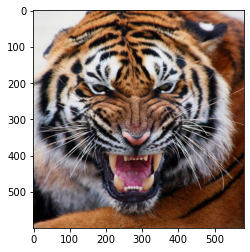

In [7]:
plt.imshow(tiger)
plt.show()

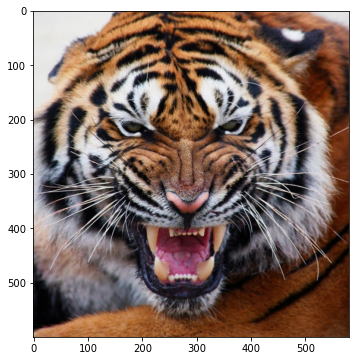

In [8]:
plt.figure(figsize=(6,6)) # задаваме размера на изображението
plt.imshow(tiger)
# plt.xticks([]) # премахваме числата по х 
# plt.yticks([]) # премахваме числата по у
plt.show()

In [9]:
tiger

array([[[223, 224, 226],
        [223, 224, 226],
        [223, 224, 226],
        ...,
        [225, 225, 227],
        [225, 225, 227],
        [225, 225, 227]],

       [[223, 224, 226],
        [223, 224, 226],
        [223, 224, 226],
        ...,
        [225, 225, 227],
        [225, 225, 227],
        [225, 225, 227]],

       [[224, 225, 227],
        [224, 225, 227],
        [224, 225, 227],
        ...,
        [226, 226, 228],
        [226, 226, 228],
        [226, 226, 228]],

       ...,

       [[199, 161, 124],
        [197, 159, 120],
        [198, 156, 118],
        ...,
        [ 80,  39,  19],
        [ 79,  38,  18],
        [ 79,  38,  18]],

       [[186, 147, 106],
        [185, 143, 103],
        [183, 140,  98],
        ...,
        [ 83,  42,  22],
        [ 82,  41,  21],
        [ 82,  41,  21]],

       [[175, 133,  91],
        [172, 129,  87],
        [169, 124,  82],
        ...,
        [ 84,  43,  23],
        [ 84,  43,  23],
        [ 83,  42,  22]]

In [10]:
tiger[0] # първият ред

array([[223, 224, 226],
       [223, 224, 226],
       [223, 224, 226],
       ...,
       [225, 225, 227],
       [225, 225, 227],
       [225, 225, 227]], dtype=uint8)

In [11]:
tiger[0][0] # първият пиксел

array([223, 224, 226], dtype=uint8)

In [12]:
tiger[0, 0] # първият пиксел

array([223, 224, 226], dtype=uint8)

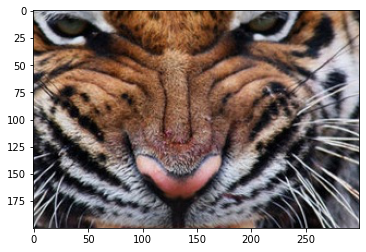

In [13]:
plt.imshow(tiger[200:400, 150:450]) # изрязване на изображението
plt.show()

In [14]:
tiger_r = tiger[:, :, 0]
tiger_g = tiger[:, :, 1]
tiger_b = tiger[:, :, 2]

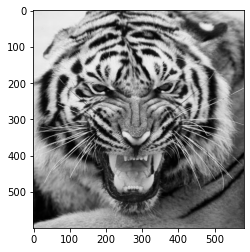

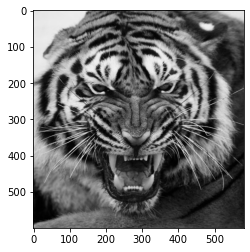

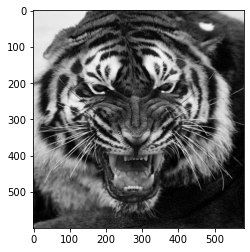

In [15]:
plt.imshow(tiger_r, cmap= 'gray')
plt.show()
plt.imshow(tiger_g, cmap= 'gray')
plt.show()
plt.imshow(tiger_b, cmap= 'gray')
plt.show()

In [16]:
tiger_grayscale = 0.299*tiger_r + 0.587*tiger_g + 0.114*tiger_b

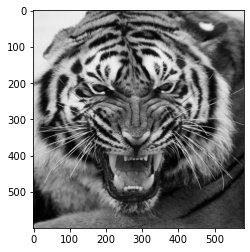

In [17]:
plt.imshow(tiger_grayscale, cmap='gray')
plt.show()

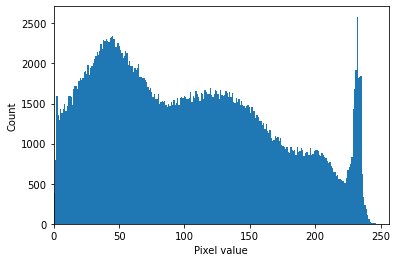

In [18]:
plt.hist(tiger_grayscale.ravel(), bins=256) # с ravel(). превръщаме двумерния масив в едномерен, подреждат се едно след друго

plt.xlim(0,256)

plt.xlabel('Pixel value')
plt.ylabel('Count') # работим с бройката

plt.show()

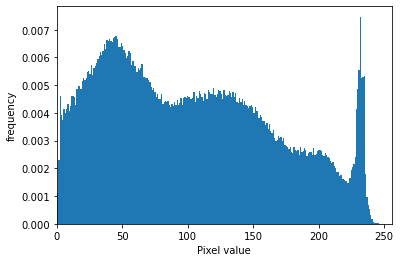

In [19]:
plt.hist(tiger_grayscale.ravel(), bins=256, density= True) 

plt.xlim(0,256)

plt.xlabel('Pixel value')
plt.ylabel('frequency')

plt.show()

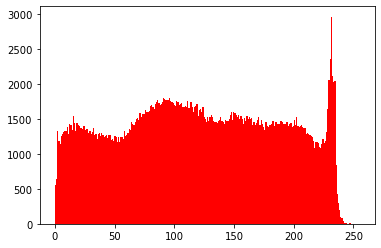

In [20]:
plt.hist(tiger_r.ravel(), bins=256, color = 'red')
plt.show()

In [21]:
tiger_r.mean(), tiger_g.mean(), tiger_b.mean()

(120.5371867816092, 97.31666091954023, 87.46468390804597)

In [22]:
size = 55
conv_filter = np.ones((size, size)) / (size * size)
conv_filter
blurred = convolve(tiger_grayscale, conv_filter)

In [23]:
blurred

array([[228.33267967, 228.3328886 , 228.33655405, ..., 216.91070942,
        216.94918711, 216.97574975],
       [228.35004959, 228.35025851, 228.35392397, ..., 216.72586149,
        216.76725554, 216.79499702],
       [228.36653223, 228.36666579, 228.37025587, ..., 216.3238876 ,
        216.37044959, 216.4011038 ],
       ...,
       [ 84.26069091,  84.28786116,  84.33439868, ...,  50.85059967,
         50.85786975,  50.87439405],
       [ 84.25260099,  84.27977124,  84.32630876, ...,  50.81160694,
         50.81854645,  50.83497554],
       [ 84.24598413,  84.27249322,  84.31870017, ...,  50.77462744,
         50.77991405,  50.79558314]])

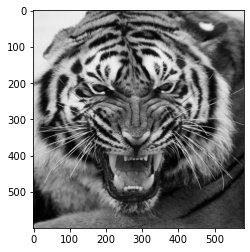

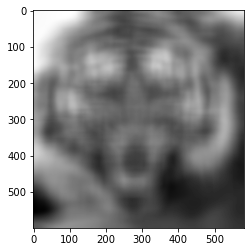

In [24]:
plt.imshow(tiger_grayscale, cmap='gray')
plt.show()
plt.imshow(blurred, cmap='gray')
plt.show()

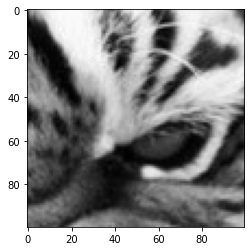

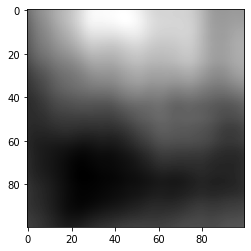

In [25]:
plt.imshow(tiger_grayscale[150:250 , 300:400], cmap='gray')
plt.show()
plt.imshow(blurred[150: 250 , 300: 400 ], cmap='gray')
plt.show()

In [26]:
edge_detector = np.array([
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
    ]
)
edges = convolve(tiger_grayscale, edge_detector)

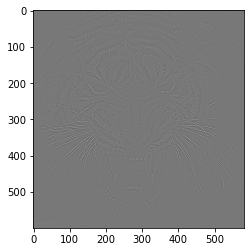

In [27]:
plt.imshow(edges, cmap='gray', vmin = edges.min(), vmax = edges.max())
plt.show()

In [28]:
edges.min(), edges.max()

(-385.49499999999995, 432.22799999999995)

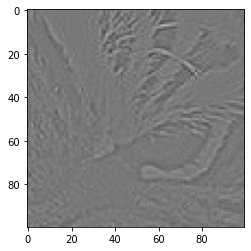

In [29]:
plt.imshow(edges[150:250 , 300:400], cmap='gray', vmin = edges.min(), vmax = edges.max())
plt.show()

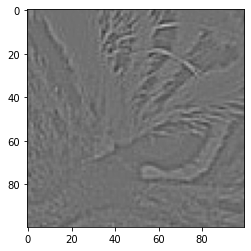

In [30]:
edge_detector = np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ]
)
edges = convolve(tiger_grayscale, edge_detector)
plt.imshow(edges[150:250 , 300:400], cmap='gray', vmin = edges.min(), vmax = edges.max())
plt.show()

In [33]:
tiger_binary = tiger_grayscale.copy()
threshold = 128 # колкото е по-малко числото, толкова изображението е по-светло и обратно
tiger_binary[tiger_binary <= threshold] = 0
tiger_binary[tiger_binary > threshold] = 255

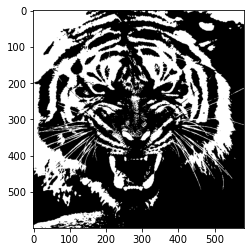

In [34]:
plt.imshow(tiger_binary, cmap='gray')
plt.show()

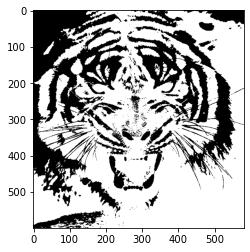

In [35]:
plt.imshow(255-tiger_binary, cmap='gray') # негатив на изображението 255 е максималната ст-ст и от нея вадим текущите такива
plt.show()

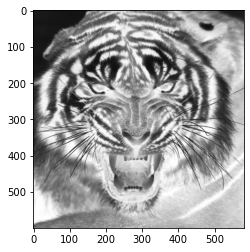

In [36]:
plt.imshow(255-tiger_grayscale, cmap='gray') # негатив на изображението 255 е максималната ст-ст и от нея вадим текущите такива
plt.show()

In [37]:
with open ('alice.txt', 'r', encoding='utf-8') as file:
    alice = file.read()

In [40]:
re.split("\W+", alice) # сплитваме за да отделим думите

['',
 'Project',
 'Gutenberg',
 's',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'You',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'eBook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'Title',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'Author',
 'Lewis',
 'Carroll',
 'Release',
 'Date',
 'June',
 '25',
 '2008',
 'EBook',
 '11',
 'Last',
 'Updated',
 'October',
 '6',
 '2016',
 'Language',
 'English',
 'Character',
 'set',
 'encoding',
 'UTF',
 '8',
 'START',
 'OF',
 'THIS',
 'PROJECT',
 'GUTENBERG',
 'EBOOK',
 'ALICE',
 'S',
 'ADVENTURES',
 'IN',
 'WONDERLAND',
 'Produced',
 'by',
 'Arthur',
 'DiBianca',
 'and',

In [41]:
alice_words = [word for word in re.split("\W+", alice) if word != '']

In [45]:
alice_counter = Counter(alice_words)

In [49]:
alice_counter.most_common(10)

[('the', 1693),
 ('and', 875),
 ('to', 802),
 ('a', 677),
 ('of', 609),
 ('I', 546),
 ('it', 543),
 ('she', 513),
 ('said', 458),
 ('in', 416)]

In [53]:
[pair[1] for pair in alice_counter.most_common(10)] # изваждаме стойността на броя на всяка дума от всеки тюпъл и го превръщаме в лист

[1693, 875, 802, 677, 609, 546, 543, 513, 458, 416]

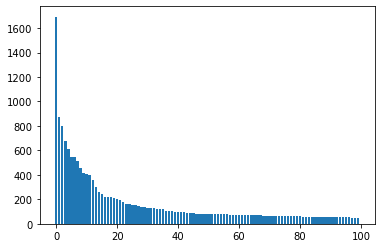

In [60]:
most_common_counts = [pair[1] for pair in alice_counter.most_common(100)]
# задаваме параметрите за барчарт - рейндж - дължината на листа, листа
plt.bar(range(len(most_common_counts)), most_common_counts) # най-често срещаните думи в текста
plt.show()

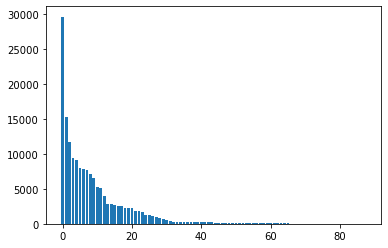

In [62]:
most_common_characters = [pair[1] for pair in Counter(alice).most_common(100)]
# тук вадим графика за най-често срещаните букви в текста
plt.bar(range(len(most_common_characters)), most_common_characters) 
plt.show()

In [66]:
Counter(alice.lower()).most_common(10)

[(' ', 29580),
 ('e', 15441),
 ('t', 12241),
 ('a', 9846),
 ('o', 9496),
 ('i', 8669),
 ('n', 8066),
 ('h', 7915),
 ('s', 7280),
 ('r', 6648)]

In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
english_stopwords = set(stopwords.words('english'))

In [87]:
# изчистваме стоп думите от текста
alice_words_clean = [word.lower() for word in alice_words if word.lower() not in english_stopwords]

In [88]:
Counter(alice_words_clean).most_common(20)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58)]

In [95]:
PorterStemmer().stem('doing')

'do'

In [96]:
alice_words_stems = [PorterStemmer().stem(word) for word in alice_words_clean]

In [97]:
alice_words_stems

['project',
 'gutenberg',
 'alic',
 'adventur',
 'wonderland',
 'lewi',
 'carrol',
 'ebook',
 'use',
 'anyon',
 'anywher',
 'cost',
 'almost',
 'restrict',
 'whatsoev',
 'may',
 'copi',
 'give',
 'away',
 'use',
 'term',
 'project',
 'gutenberg',
 'licens',
 'includ',
 'ebook',
 'onlin',
 'www',
 'gutenberg',
 'org',
 'titl',
 'alic',
 'adventur',
 'wonderland',
 'author',
 'lewi',
 'carrol',
 'releas',
 'date',
 'june',
 '25',
 '2008',
 'ebook',
 '11',
 'last',
 'updat',
 'octob',
 '6',
 '2016',
 'languag',
 'english',
 'charact',
 'set',
 'encod',
 'utf',
 '8',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'alic',
 'adventur',
 'wonderland',
 'produc',
 'arthur',
 'dibianca',
 'david',
 'widger',
 'alic',
 'adventur',
 'wonderland',
 'lewi',
 'carrol',
 'millennium',
 'fulcrum',
 'edit',
 '3',
 '0',
 'content',
 'chapter',
 'rabbit',
 'hole',
 'chapter',
 'ii',
 'pool',
 'tear',
 'chapter',
 'iii',
 'caucu',
 'race',
 'long',
 'tale',
 'chapter',
 'iv',
 'rabbit',
 'send',
 'littl',

In [106]:
Counter(alice_words_stems).most_common(20)

[('said', 462),
 ('alic', 404),
 ('littl', 129),
 ('one', 107),
 ('look', 106),
 ('like', 97),
 ('gutenberg', 93),
 ('know', 92),
 ('project', 87),
 ('work', 86),
 ('would', 83),
 ('went', 83),
 ('thing', 82),
 ('thought', 80),
 ('could', 78),
 ('queen', 77),
 ('time', 77),
 ('go', 77),
 ('see', 71),
 ('say', 70)]

In [127]:
vectorizer = TfidfVectorizer(
    input = "content", 
    analyzer = "word", 
    ngram_range = (1, 3), 
    min_df = 0,  
    stop_words = english_stopwords, 
    sublinear_tf = True,
)

In [128]:
vectorizer

TfidfVectorizer(min_df=0, ngram_range=(1, 3),
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                sublinear_tf=True)

In [129]:
newsgroups = fetch_20newsgroups()

In [130]:
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [131]:
print(newsgroups.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [132]:
vectorized_data = vectorizer.fit_transform(newsgroups.data)

In [137]:
pd.read_xml('https://www.nsi.bg/sites/default/files/statistical_metadata/ESMS.2.1_xml/ESMS_0271_NSI_marketpricesofdwellings_2012-N1_SDMX.2.1.xml')

AttributeError: module 'pandas' has no attribute 'read_xml'